# Introduction

This chapter discusses the biochemical processes behind the information capabilities of the brain. Simulations in this chapter are based on sets of differential equations describing the voltage and condutance of the neuron membrane and the ion channels in them.

### Imports 

In [3]:
using DifferentialEquations
using Plots

# Excitatory Postsynaptic Potential 

When a presynaptic neuron releases neurotransmissors in a synapse, this induces a variation in the membrane potential in the postsynaptic neuron called _postsynaptic potential_. This variation is described by the _alpha function_, which is typically used to model chemical synapses. This alpha function, combined with difference of potential of the ions inside and outside the membrane induces a differential equation relating the voltage and the membrane leakage channel.

In [13]:
# define variables for the model 
struct EPSPModel
    capacitance :: Float64
    back_condutance :: Float64
    τ :: Float64
    back_potential :: Float64
    
    # default values
    function EPSPModel()
        new(1, 1, 1, 10)
    end
end

# and the equations based on those variables
function equations(model::EPSPModel)
    # f[1] = voltage, f[2] = condutance
    V = 1; C = 2
    
    function δ(x::Float64)
        abs(x) < 0.5 && return 1
        return 0
    end
    
    function diffeq(df, f, _, t)
        current = f[C] * (f[V] - model.back_potential)
        
        df[V] = - (1/model.capacitance) * (current + model.back_condutance * f[V]) 
        df[C] = (1/model.τ) * (-f[C] + δ(t-1))
    end
end
;

When we simulate this equations, we can see that membrane potential initially spikes when the neurotransmissor reaches the membrane and then gradually resets back to it's initial value

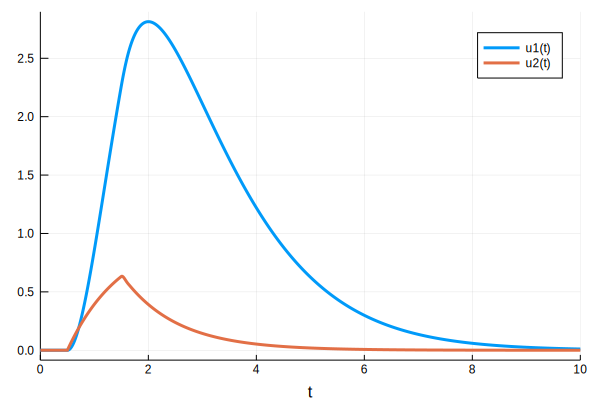

In [10]:
# instantiate a model, initial conditions, and boundaries
model = EPSPModel()
initial_conditions = [0.0, 0.0]
tspan = (0.0, 10.0)

# and solve
problem = ODEProblem(equations(model), initial_conditions, tspan)
solution = solve(problem)
plot(solution)

# The Hodgkin-Huxley Model